In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime as dt
from datetime import timedelta as tdel
from matplotlib.dates import DateFormatter
import pathlib

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'
# rc('text', usetex=True)

In [3]:
outdir = "output"

## DFT Demo

In [4]:
miles = np.array([[203442, 199261, 232490, 227698, 242501, 242963, 245140, 247832,
        227899, 236491, 222819, 218390],
       [209685, 200876, 232587, 232513, 245357, 243498, 250363, 253274,
        226312, 241050, 230511, 229584],
       [215215, 208237, 236070, 237226, 251746, 247868, 256392, 258666,
        233625, 245556, 230648, 234260],
       [218534, 203677, 236679, 239415, 253244, 252145, 262105, 260687,
        237451, 254048, 233698, 238538],
       [222450, 213709, 251403, 250968, 257235, 257383, 265969, 262836,
        243515, 254496, 239796, 245029],
       [224072, 219970, 253182, 250860, 262678, 263816, 267025, 265323,
        242240, 251419, 243056, 245787],
       [233302, 220730, 256645, 250665, 263393, 263805, 263442, 265229,
        245624, 257961, 245367, 248208],
       [233799, 219221, 259740, 252734, 267646, 265475, 267179, 271401,
        246050, 261505, 245928, 240444],
       [233469, 221728, 252773, 252699, 261890, 256152, 262152, 261228,
        238701, 256402, 237009, 242326],
       [224840, 218031, 247433, 251481, 258793, 258487, 265026, 260838,
        242034, 252683, 237342, 239774],
       [220177, 210968, 251858, 254014, 257401, 260159, 265861, 264358,
        244712, 256867, 239656, 240932],
       [222724, 213547, 250410, 249309, 254145, 258025, 260317, 260623,
        241764, 252058, 238278, 244615],
       [226834, 218714, 253785, 249567, 261355, 260534, 260880, 264983,
        239001, 254170, 240734, 238876],
       [228607, 216306, 250496, 252116, 263923, 260023, 264570, 268609,
        242582, 259281, 240146, 241365],
       [226444, 215166, 252089, 257947, 268075, 264868, 272335, 271018,
        249125, 267185, 242816, 253618]])

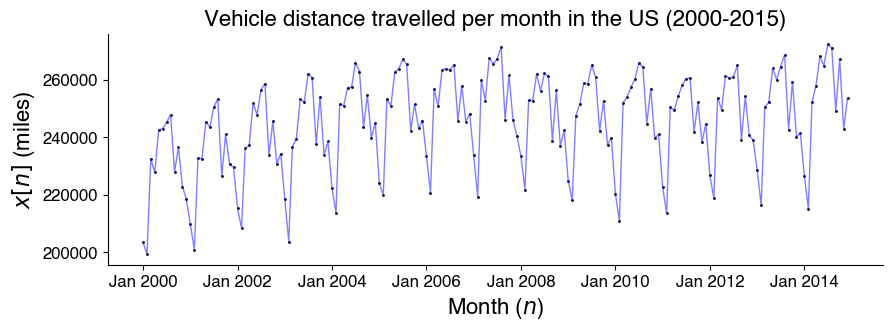

In [5]:
# Miles data
allmiles = miles.reshape(-1)
time = [dt(day=1, month=m, year=y)
        for y in np.arange(2000, 2015, 1)
        for m in np.arange(1, 13, 1)]

fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.plot(time, allmiles, '.', color='black', markersize=2)
ax.plot(time, allmiles, color='blue', lw=1, alpha=0.5)
# ax.set_xlim(1, len(allmiles))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Month ($n$)", fontsize=16)
ax.set_ylabel("$x[n]$ (miles)", fontsize=16)
date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.tick_params(axis='both', labelsize=12)
ax.set_title("Vehicle distance travelled per month in the US (2000-2015)", fontsize=16);

# Save figure
fig.savefig(pathlib.Path(outdir, "miles.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles.svg"), bbox_inches='tight')

In [6]:
# Compute the FFT of the data
miles_fft = np.fft.fft(allmiles)
freq = np.arange(0, 1, 1.0 / len(allmiles))

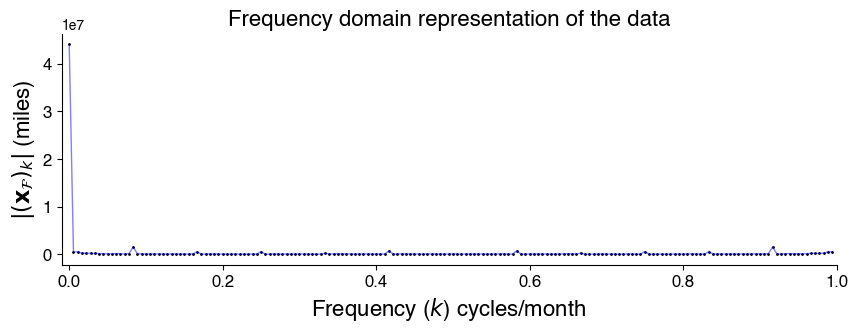

In [7]:
# Miles data
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.plot(freq, np.abs(miles_fft), '.', color='black', markersize=2)
ax.plot(freq, np.abs(miles_fft), color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency ($k$) cycles/month", fontsize=16)
ax.set_ylabel("$| (\mathbf{x}_\mathcal{F})_k |$ (miles)", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.set_title("Frequency domain representation of the data", fontsize=16);

# Save figure
fig.savefig(pathlib.Path(outdir, "miles_fft.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles_fft.svg"), bbox_inches='tight')

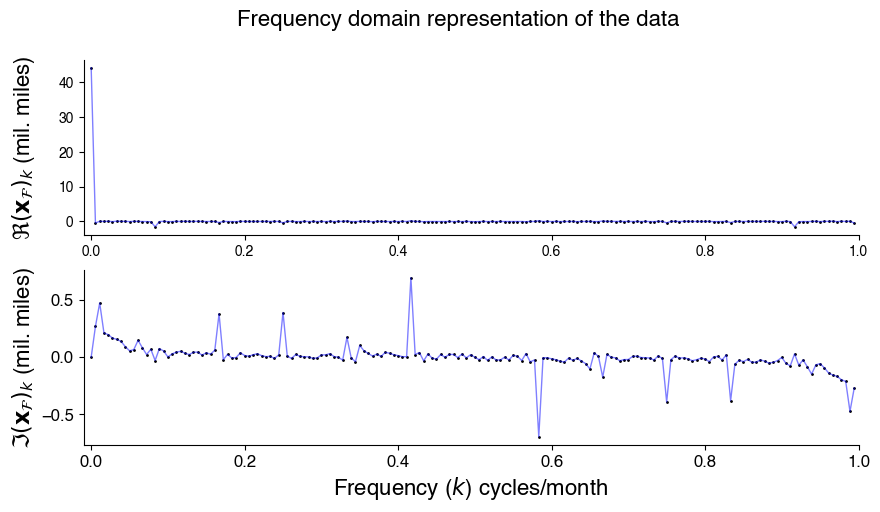

In [8]:
# Miles data
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(211)
ax.plot(freq, np.real(miles_fft) / 1e6, '.', color='black', markersize=2)
ax.plot(freq, np.real(miles_fft) / 1e6, color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel("$\Re (\mathbf{x}_\mathcal{F})_k$ (mil. miles)", fontsize=16)
ax.yaxis.set_label_coords(-0.06, 0.5)
ax = fig.add_subplot(212)
ax.plot(freq, np.imag(miles_fft) / 1e6, '.', color='black', markersize=2)
ax.plot(freq, np.imag(miles_fft) / 1e6, color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency ($k$) cycles/month", fontsize=16)
ax.set_ylabel("$\Im (\mathbf{x}_\mathcal{F})_k$ (mil. miles)", fontsize=16)
ax.yaxis.set_label_coords(-0.06, 0.5)
ax.tick_params(axis='both', labelsize=12)
plt.suptitle("Frequency domain representation of the data", fontsize=16);


# Save figure
fig.savefig(pathlib.Path(outdir, "miles_fft_reim.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles_fft_reim.svg"), bbox_inches='tight')

In [9]:
# Let's remove the DC component as we are not interested in the time varying 
# component.
allmiles_new = allmiles - np.mean(allmiles)

# Compute the FFT of the data
miles_new_fft = np.fft.fft(allmiles_new)

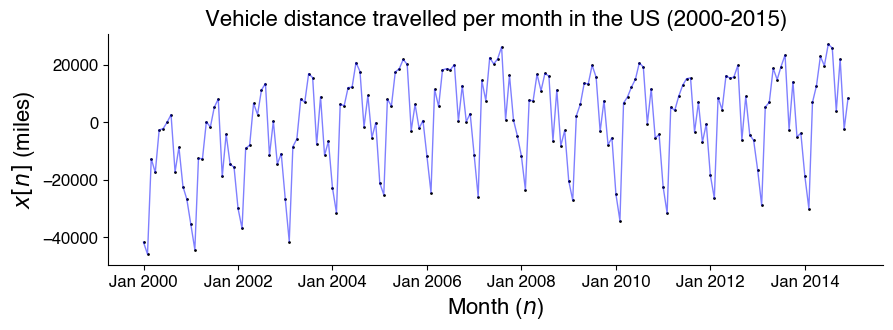

In [10]:
# Miles data
allmiles = miles.reshape(-1)
time = [dt(day=1, month=m, year=y)
        for y in np.arange(2000, 2015, 1)
        for m in np.arange(1, 13, 1)]

fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.plot(time, allmiles_new, '.', color='black', markersize=2)
ax.plot(time, allmiles_new, color='blue', lw=1, alpha=0.5)
# ax.set_xlim(1, len(allmiles))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Month ($n$)", fontsize=16)
ax.set_ylabel("$x[n]$ (miles)", fontsize=16)
date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.tick_params(axis='both', labelsize=12)
ax.set_title("Vehicle distance travelled per month in the US (2000-2015)", fontsize=16);

# Save figure
fig.savefig(pathlib.Path(outdir, "miles_nomean.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles_nomean.svg"), bbox_inches='tight')

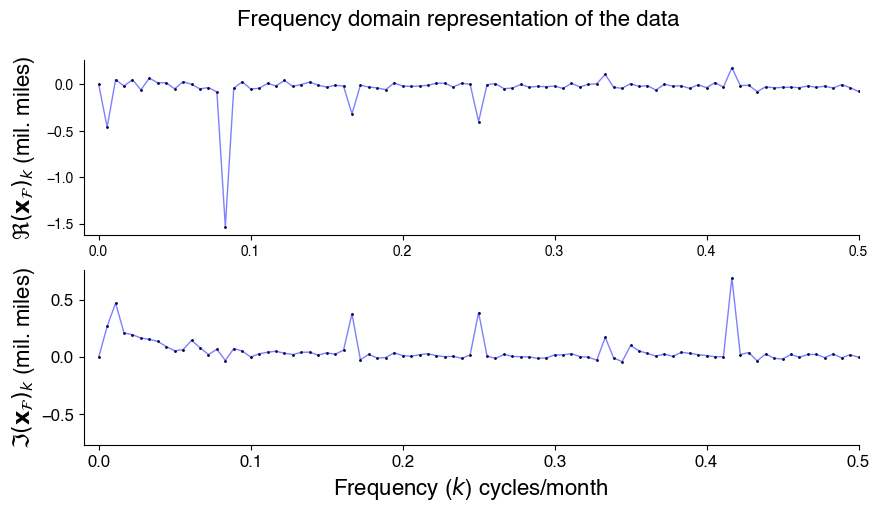

In [11]:
# Miles data
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(211)
ax.plot(freq, np.real(miles_new_fft) / 1e6, '.', color='black', markersize=2)
ax.plot(freq, np.real(miles_new_fft) / 1e6, color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel("$\Re (\mathbf{x}_\mathcal{F})_k$ (mil. miles)", fontsize=16)
ax.yaxis.set_label_coords(-0.06, 0.5)
ax = fig.add_subplot(212)
ax.plot(freq, np.imag(miles_new_fft) / 1e6, '.', color='black', markersize=2)
ax.plot(freq, np.imag(miles_new_fft) / 1e6, color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency ($k$) cycles/month", fontsize=16)
ax.set_ylabel("$\Im (\mathbf{x}_\mathcal{F})_k$ (mil. miles)", fontsize=16)
ax.yaxis.set_label_coords(-0.06, 0.5)
ax.tick_params(axis='both', labelsize=12)
plt.suptitle("Frequency domain representation of the data", fontsize=16);


# Save figure
fig.savefig(pathlib.Path(outdir, "miles_nomean_fft_reim.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles_nomean_fft_reim.svg"), bbox_inches='tight')

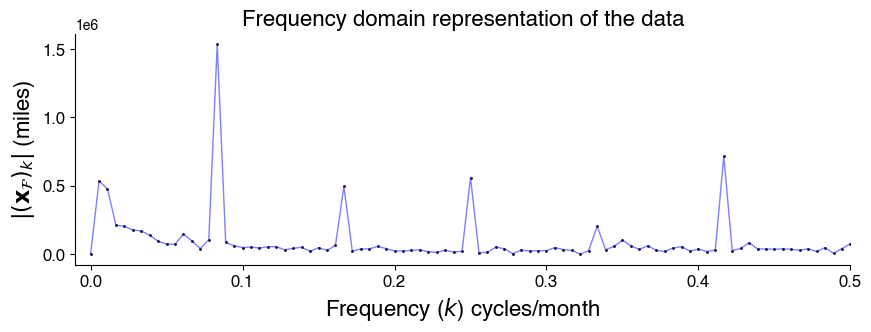

In [12]:
# Miles data
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.plot(freq, np.abs(miles_new_fft), '.', color='black', markersize=2)
ax.plot(freq, np.abs(miles_new_fft), color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency ($k$) cycles/month", fontsize=16)
ax.set_ylabel("$| (\mathbf{x}_\mathcal{F})_k |$ (miles)", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.set_title("Frequency domain representation of the data", fontsize=16);


# Save figure
fig.savefig(pathlib.Path(outdir, "miles_nomean_fft.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles_nomean_fft.svg"), bbox_inches='tight')

## Transient signals and their representaiton

In [13]:
import pywt

In [14]:
np.random.seed(0)
N = 128
n = np.arange(0, N)
# Signal 1
x1 = np.zeros(N)
x1[64:72] = 0.5
x1[72:80] = -0.5
x1 += np.random.randn(N) * 0.025
# Signal 2
x2 = np.zeros(N)
x2[16:24] = -0.5
x2[24:32] = 0.5
x2 += np.random.randn(N) * 0.025

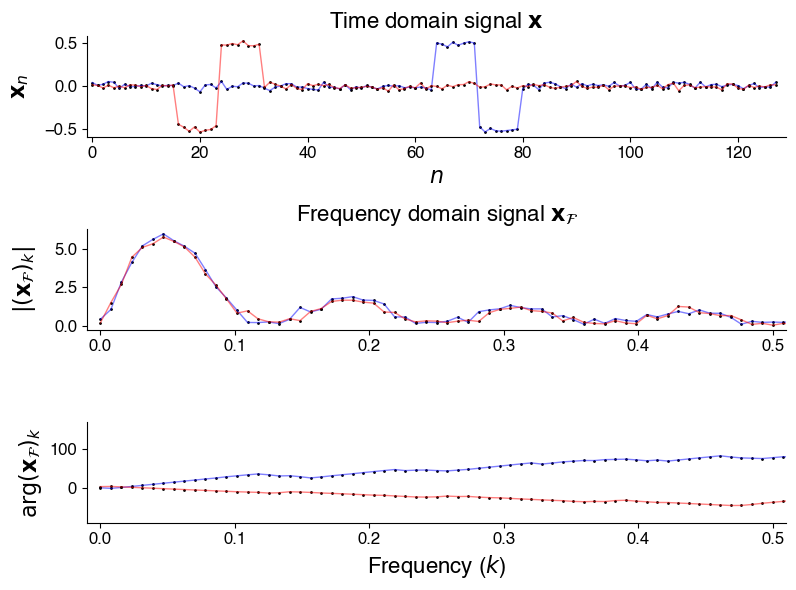

In [15]:
# Plot of the transient signal nad its FFT
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(311)
ax.plot(n, x1, '.', color='black', markersize=2)
ax.plot(n, x1, color='blue', lw=1, alpha=0.5)
ax.plot(n, x2, '.', color='black', markersize=2)
ax.plot(n, x2, color='red', lw=1, alpha=0.5)
ax.set_xlim(-1, N+1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("$n$", fontsize=16)
ax.set_ylabel("$\mathbf{x}_n$", fontsize=16)
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.set_title("Time domain signal $\mathbf{x}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax = fig.add_subplot(312)
_f, _xf1 = np.arange(0, 1, 1 / N), np.abs(np.fft.fft(x1)), 
_f, _xf2 = np.arange(0, 1, 1 / N), np.abs(np.fft.fft(x2)), 
ax.plot(_f, _xf1, '.', color='black', markersize=2)
ax.plot(_f, _xf1, color='blue', lw=1, alpha=0.5)
ax.plot(_f, _xf2, '.', color='black', markersize=2)
ax.plot(_f, _xf2, color='red', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 0.51)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_xlabel("Frequency ($k$)", fontsize=16)
ax.set_ylabel("$| (\mathbf{x}_\mathcal{F})_k |$", fontsize=16)
ax.yaxis.set_label_coords(-0.07, 0.5)
ax.set_title("Frequency domain signal $\mathbf{x}_{\mathcal{F}}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax = fig.add_subplot(313)
_f, _xf1 = np.arange(0, 1, 1 / N), np.unwrap(np.angle(np.fft.fft(x1))) 
_f, _xf2 = np.arange(0, 1, 1 / N), np.unwrap(np.angle(np.fft.fft(x2)))
ax.plot(_f, _xf1, '.', color='black', markersize=2)
ax.plot(_f, _xf1, color='blue', lw=1, alpha=0.5)
ax.plot(_f, _xf2, '.', color='black', markersize=2)
ax.plot(_f, _xf2, color='red', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 0.51)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency ($k$)", fontsize=16)
ax.set_ylabel("$\\arg (\mathbf{x}_\mathcal{F})_k$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "signal_transient.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "signal_transient.svg"), bbox_inches='tight')

In [16]:
wtcoeff1 = pywt.wavedec(x1, 'haar', mode='symmetric')
wtcoeff2 = pywt.wavedec(x2, 'haar', mode='symmetric')

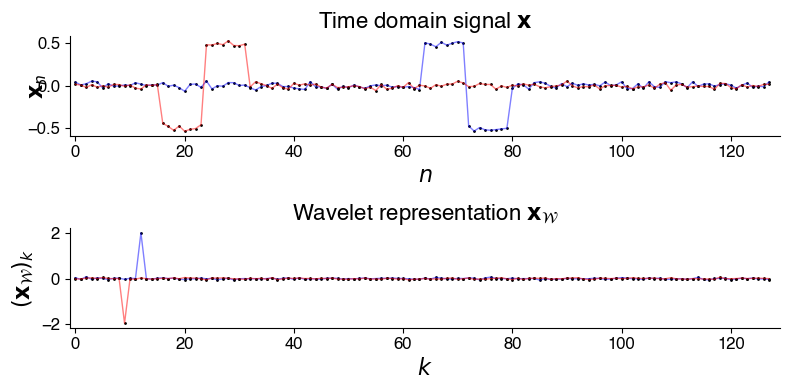

In [17]:
# Plot of the transient signal nad its FFT
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(211)
ax.plot(n, x1, '.', color='black', markersize=2)
ax.plot(n, x1, color='blue', lw=1, alpha=0.5)
ax.plot(n, x2, '.', color='black', markersize=2)
ax.plot(n, x2, color='red', lw=1, alpha=0.5)
ax.set_xlim(-1, N+1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("$n$", fontsize=16)
ax.set_ylabel("$\mathbf{x}_n$", fontsize=16)
ax.yaxis.set_label_coords(-0.03, 0.5)
ax.set_title("Time domain signal $\mathbf{x}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax = fig.add_subplot(212)
ax.plot(n, np.hstack(wtcoeff1), '.', color='black', markersize=2)
ax.plot(n, np.hstack(wtcoeff1), color='blue', lw=1, alpha=0.5)
ax.plot(n, np.hstack(wtcoeff2), '.', color='black', markersize=2)
ax.plot(n, np.hstack(wtcoeff2), color='red', lw=1, alpha=0.5)
ax.set_xlim(-1, N+1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("$k$", fontsize=16)
ax.set_ylabel("$(\mathbf{x}_\mathcal{W})_k$", fontsize=16)
ax.set_title("Wavelet representation $\mathbf{x}_{\mathcal{W}}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "signal_transient_wavedec.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "signal_transient_wavedec.svg"), bbox_inches='tight')

## Wavelet basis

In [18]:
def get_wtcoeff_loc(N, inx):
    steps = int(np.log2(N))
    for s in range(steps):
        a, b = inx // (N // 2**(s+1)), inx % (N // 2**(s+1))
        if a == 1:
            break
    return steps - s if a == 1 else 0, b,

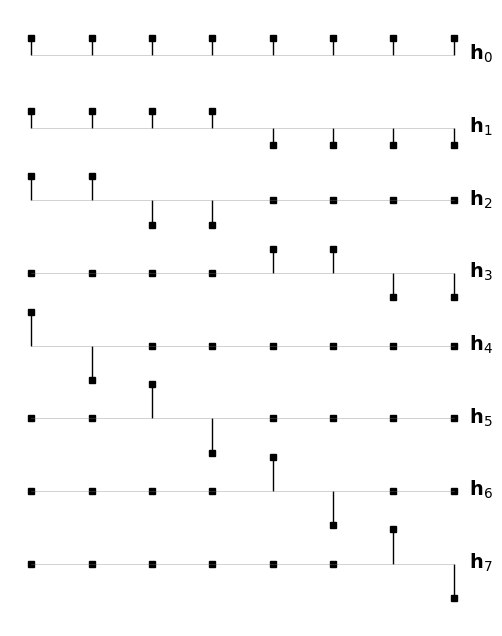

In [19]:
N = 8

fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111)
for i in range(0, N):
    a, b = get_wtcoeff_loc(N, i)
    wtcoeff = [np.array([0]), np.array([0]), np.array([0, 0]), np.array([0, 0, 0, 0])]
    wtcoeff[a][b] = 1
    markerline, stemlines, baseline = ax.stem(np.arange(N),
                                              pywt.waverec(wtcoeff, 'haar', mode='symmetric') - 1.5 * i,
                                              bottom=-1.5 * i,
                                              markerfmt='s', linefmt='black')
    plt.setp(baseline, color='grey', linewidth=0.5, alpha=0.5)
    plt.setp(stemlines, linewidth = 1.0)
    plt.setp(markerline, markersize = 4)
    plt.text(7.25, -1.5 * i - 0.1, f"$\mathbf{{h}}_{i}$", fontsize=14)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


# Save figure
fig.savefig(pathlib.Path(outdir, "haar_vectors.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "haar_vectors.svg"), bbox_inches='tight')

In [20]:
np.random.seed(0)
N = 128
n = np.arange(0, N)
# Signal 1
x1 = np.zeros(N)
x1[50:70] = 1
x1 = x1 * np.sin(2 * np.pi * 0.05 * (n - 50))
x1 += np.random.randn(N) * 0.01

wtcoeff1 = pywt.wavedec(x1, 'haar', mode='symmetric')

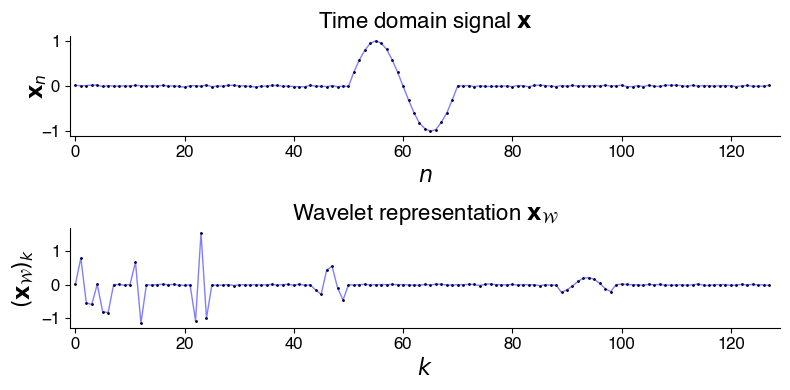

In [21]:
# Plot of the transient signal nad its FFT
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(211)
ax.plot(n, x1, '.', color='black', markersize=2)
ax.plot(n, x1, color='blue', lw=1, alpha=0.5)
# ax.plot(n, x2, '.', color='black', markersize=2)
# ax.plot(n, x2, color='red', lw=1, alpha=0.5)
ax.set_xlim(-1, N+1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("$n$", fontsize=16)
ax.set_ylabel("$\mathbf{x}_n$", fontsize=16)
ax.yaxis.set_label_coords(-0.03, 0.5)
ax.set_title("Time domain signal $\mathbf{x}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax = fig.add_subplot(212)
ax.plot(n, np.hstack(wtcoeff1), '.', color='black', markersize=2)
ax.plot(n, np.hstack(wtcoeff1), color='blue', lw=1, alpha=0.5)
# ax.plot(n, np.hstack(wtcoeff2), '.', color='black', markersize=2)
# ax.plot(n, np.hstack(wtcoeff2), color='red', lw=1, alpha=0.5)
ax.set_xlim(-1, N+1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("$k$", fontsize=16)
ax.set_ylabel("$(\mathbf{x}_\mathcal{W})_k$", fontsize=16)
ax.set_title("Wavelet representation $\mathbf{x}_{\mathcal{W}}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "sine_transient_wavedec.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "sine_transient_wavedec.svg"), bbox_inches='tight')

## Wavelet decomposition for demo

In [22]:
import pywt

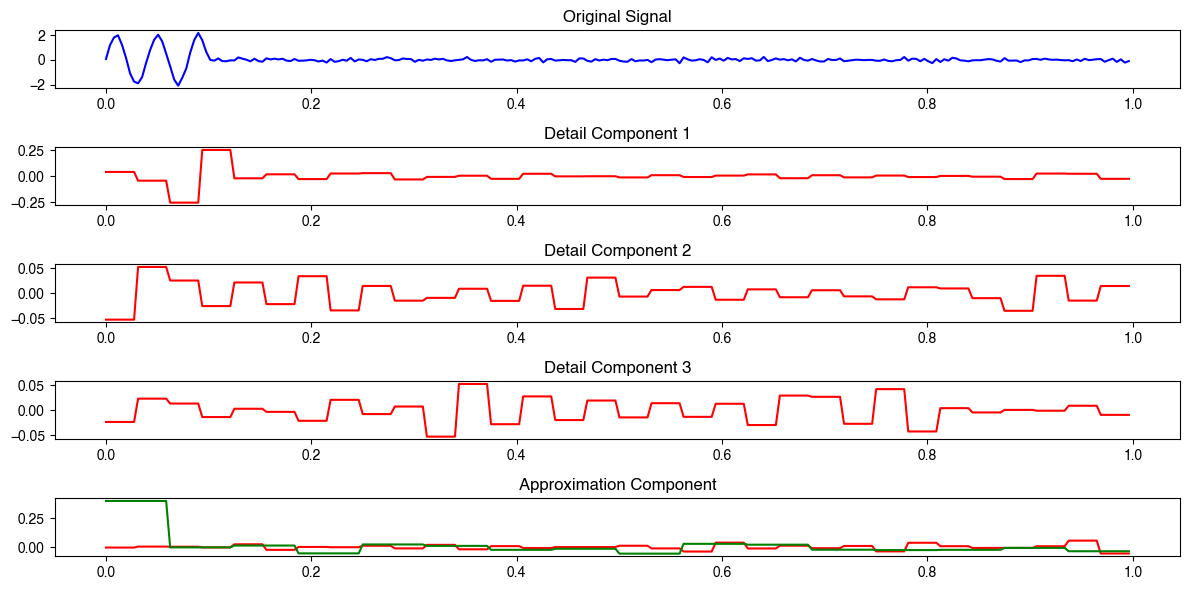

In [23]:
# Create a noisy sinusoidal pulse signal
t = np.linspace(0, 1, num=256, endpoint=False)
signal = 2 * np.sin(10 * 5 * np.pi * t) * (t <= 0.1) + 0.2 * np.random.normal(0, 0.5, len(t))

# Perform Haar wavelet decomposition
wavelet = 'haar'
coeffs = pywt.wavedec(signal, wavelet, level=4)

# Reconstruct the approximation and detail components
approximation = pywt.upcoef('a', coeffs[0], wavelet, level=4, take=len(signal))
details = [pywt.upcoef('d', coeffs[i], wavelet, level=4, take=len(signal)) for i in range(1, 5)]

# Plot the original signal and the Haar wavelet components
plt.figure(figsize=(12, 6))

# Original Signal
plt.subplot(5, 1, 1)
plt.plot(t, signal, 'b')
plt.title('Original Signal')

# Approximation Components
for i in range(4):
    plt.subplot(5, 1, i + 2)
    plt.plot(t, details[i], 'r')
    plt.title(f'Detail Component {i+1}')

# Approximation Component
plt.subplot(5, 1, 5)
plt.plot(t, approximation, 'g')
plt.title('Approximation Component')

plt.tight_layout()

## Signal processing example

In [24]:
len(t), 0.5 * dt * len(t), 0.05 * dt * len(t), 0.25 * dt * len(t), 3.5 * dt * len(t)

TypeError: unsupported operand type(s) for *: 'float' and 'type'

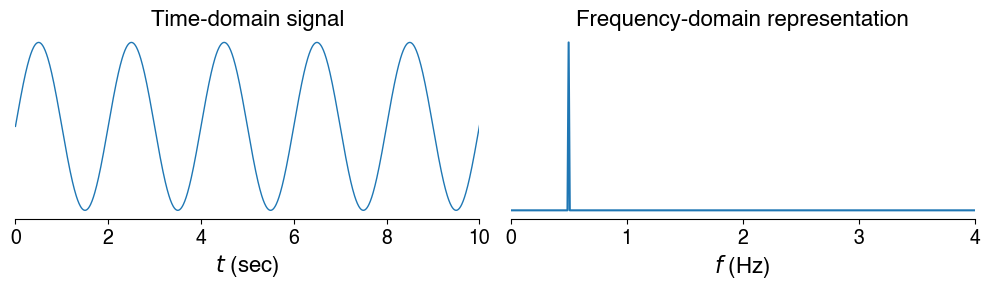

In [25]:
dt = 0.01
t = np.arange(0, 100, dt)
f1 = 0.5
f21, f22, f23, f24 = 0.05, 0.25, 0.5, 3.5
f3 = 0.761
x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * f21 * t) + 0.2 * np.sin(2 * np.pi * f22 * t) + 0.5 * np.sin(2 * np.pi * f23 * t) + 0.4 * np.sin(2 * np.pi * f24 * t)
x3 = np.sin(2 * np.pi * f3 * t)

# Grid of plots
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(221)
ax.plot(t, x1, lw=1)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # Hide ticks on the left side
ax.yaxis.set_label_coords(1.02, 0.5)  # Move the y-axis label to the right
ax.set_xlabel("$t$ (sec)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0, 10)
ax.set_title("Time-domain signal", fontsize=16)

ax = fig.add_subplot(222)
ax.plot(np.arange(0, 1 / dt, 1 / (dt * len(t))),
        np.abs(np.fft.fft(x1)))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # Hide ticks on the left side
ax.yaxis.set_label_coords(1.02, 0.5)  # Move the y-axis label to the right
ax.set_xlabel("$f$ (Hz)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0, 4)
ax.set_title("Frequency-domain representation", fontsize=16)

plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "signal1_fft.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "signal1_fft.svg"), bbox_inches='tight')

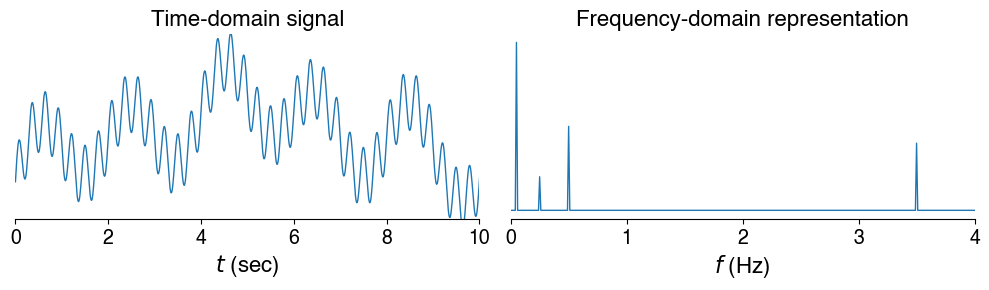

In [26]:
# Grid of plots
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(221)
ax.plot(t, x2, lw=1)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # Hide ticks on the left side
ax.yaxis.set_label_coords(1.02, 0.5)  # Move the y-axis label to the right
ax.set_xlabel("$t$ (sec)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0, 10)
ax.set_ylim(-0.5, 2)
ax.set_title("Time-domain signal", fontsize=16)

ax = fig.add_subplot(222)
ax.plot(np.arange(0, 1 / dt, 1 / (dt * len(t))),
        np.abs(np.fft.fft(x2)), lw=1)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # Hide ticks on the left side
ax.yaxis.set_label_coords(1.02, 0.5)  # Move the y-axis label to the right
ax.set_xlabel("$f$ (Hz)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0, 4)
ax.set_title("Frequency-domain representation", fontsize=16)

plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "signal2_fft.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "signal2_fft.svg"), bbox_inches='tight')

In [27]:
print("N: ", len(t))
print("Nyquist: ", 1 / (2 * dt))
print("k1: ", f1 * len(t) * dt)
print("k21: ", f21 * len(t) * dt)
print("k22: ", f22 * len(t) * dt)
print("k23: ", f23 * len(t) * dt)
print("k24: ", f24 * len(t) * dt)
print("k3: ", f3 * len(t) * dt)

N:  10000
Nyquist:  50.0
k1:  50.0
k21:  5.0
k22:  25.0
k23:  50.0
k24:  350.0
k3:  76.10000000000001


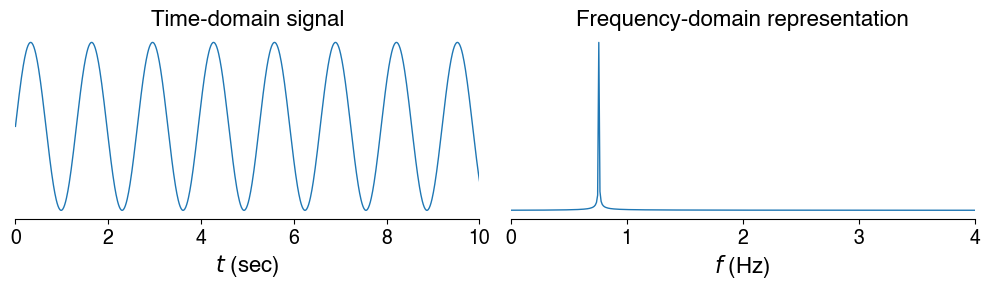

In [28]:
# Grid of plots
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(221)
ax.plot(t, x3, lw=1)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # Hide ticks on the left side
ax.yaxis.set_label_coords(1.02, 0.5)  # Move the y-axis label to the right
ax.set_xlabel("$t$ (sec)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0, 10)
ax.set_title("Time-domain signal", fontsize=16)

ax = fig.add_subplot(222)
ax.plot(np.arange(0, 1 / dt, 1 / (dt * len(t))),
        np.abs(np.fft.fft(x3)), lw=1)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # Hide ticks on the left side
ax.yaxis.set_label_coords(1.02, 0.5)  # Move the y-axis label to the right
ax.set_xlabel("$f$ (Hz)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0, 4)
ax.set_title("Frequency-domain representation", fontsize=16)

plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "signal3_fft.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "signal3_fft.svg"), bbox_inches='tight')

## Respiratory data

In [29]:
import pandas as pd

In [30]:
datafile = "../../data/Subject1.csv"
respdata = pd.read_csv(datafile, header=1)

In [31]:
respdata.head()

,time,gaugep,inspdiffp,expdiffp,chest,abdomen,chestxdepth[mm],chestxwidth[mm]
0,0.000,-2.724910,0.171648,-0.096552,829.243252,733.325121,20,28
1,0.006,-2.757094,0.171648,-0.096552,829.243252,733.357948,0,0
2,0.020,-2.842917,0.171648,-0.096552,829.243252,733.357948,0,0
3,0.024,-2.789278,0.139464,-0.064368,829.275849,733.390775,0,0
4,0.033,-2.789278,0.171648,-0.096552,829.275849,733.390775,0,0


In [32]:
# Resample the respdata dataframe at 100Hz.
dt = 0.01
t = np.arange(0, respdata.time.values[-1], dt)
# Interpolate gauge pressures data.
gaugep = np.interp(t, respdata.time.values, respdata.gaugep.values)

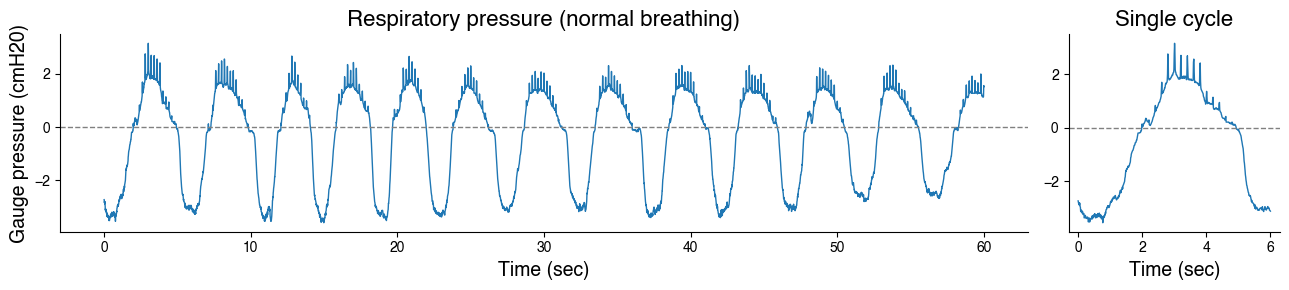

In [33]:
# Plot the pressure
T = 60
fig = plt.figure(figsize=(13, 3))
gs = gridspec.GridSpec(1, 5)
ax = fig.add_subplot(gs[0, 0:4])
ax.plot(t[t <= T], gaugep[t <= T], lw=1)
ax.axhline(y=0, color='gray', lw=1, linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Time (sec)", fontsize=14)
ax.set_ylabel("Gauge pressure (cmH20)", fontsize=14)
ax.set_title("Respiratory pressure (normal breathing)", fontsize=16)

ax = fig.add_subplot(gs[0, 4])
T = 6
ax.plot(t[t <= T], gaugep[t <= T], lw=1)
ax.axhline(y=0, color='gray', lw=1, linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Time (sec)", fontsize=14)
ax.set_title("Single cycle", fontsize=16)

plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "breathing_t.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "braathing_t.svg"), bbox_inches='tight')

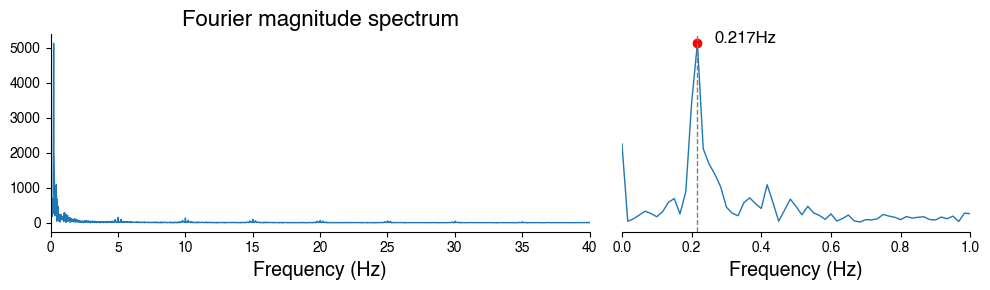

In [34]:
# Breathing data from from the first 60seconds
T = 60
x = gaugep[t <= T]
# DFT of the respiratory data
X = np.fft.fft(x)
freq = np.arange(0, 1 / dt, 1.0 / (dt * len(X)))

# plt.plot(freq, n# Plot the pressure
fig = plt.figure(figsize=(10, 3))
gs = gridspec.GridSpec(1, 5)
ax = fig.add_subplot(gs[0, 0:3])
ax.plot(freq, np.abs(X), lw=1)
ax.set_xlim(0, 40)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency (Hz)", fontsize=14)
# ax.set_ylabel("Gauge pressure (cmH20)", fontsize=14)
ax.set_title("Fourier magnitude spectrum", fontsize=16)

ax = fig.add_subplot(gs[0, 3:5])
T = 6
ax.plot(freq, np.abs(X), lw=1)
ax.plot([freq[np.argmax(np.abs(X))]], [np.max(np.abs(X))], 'ro')
ax.axvline(x=freq[np.argmax(np.abs(X))], color='gray', lw=1, linestyle='--')
ax.text(freq[np.argmax(np.abs(X))] + 0.05, np.max(np.abs(X)), f"{freq[np.argmax(np.abs(X))]:.3f}Hz", fontsize=12)
ax.set_xlim(0, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency (Hz)", fontsize=14)
ax.yaxis.set_ticks([])  # Hide ticks on the left side

plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "breathing_fft.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "braathing_fft.svg"), bbox_inches='tight')

## Overcomplete basis and sparse representation

In [35]:
from sklearn.decomposition import SparseCoder

In [54]:
def haar_basis(N: int) -> np.array:
    """Returns the Haar basis in R^N.
    """
    if N % 2 != 0:
        raise ValueError("N must be a power of 2")
    
    H = np.zeros((N, N))
    H[:, 0] = 1 / np.sqrt(N)

    # Compute the Haar wavelet basis
    step = 1

    for i in range(1, N):
        j = int(np.floor(np.log2(i)))
        shift = N // (2 ** j)
        k = (i % 2 ** j) * shift
        H[k:k+shift//2, i] = 1 / np.sqrt(shift)
        H[k+shift//2:k+shift, i] = - 1 / np.sqrt(shift)
    return H

In [73]:
# Build a matrix with the Fouirer basis, Haar basis, and time shift sinusoidal 
# pulses of different frequencies.
N = 256
# Fourier basis
F = np.fft.fft(np.eye(N)).conj()
# Real component
F = np.hstack((F.real, F.imag))
# Haar basis
H = haar_basis(N)

# A combined overcomplete basis
B = np.hstack((F, H))

/Users/siva82kb/anaconda3/envs/alada/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 13 iterations, alpha=3.725e-02, previous alpha=3.725e-02, with an active set of 14 regressors.
  warnings.warn(


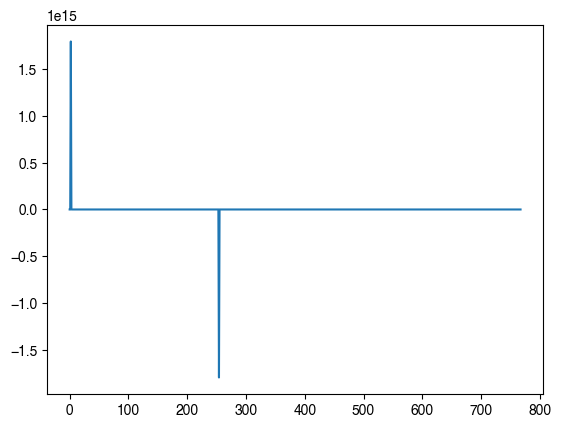

In [83]:
x = np.cos(2 * np.pi * 2 * np.arange(0, N) / N) + np.sin(2 * np.pi * 2 * np.arange(0, N) / N)
coder = SparseCoder(dictionary=B.T, transform_algorithm='lasso_lars', transform_alpha=0.1)
x_rep = coder.transform(x.reshape(1, -1))

plt.plot(x_rep[0])

In [81]:
x_rep

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [63]:
n = 10   # number of dimensions (rows)
m = 50   # number of signals (columns)
A = np.random.rand(n, m)

# Step 2: Define a new signal x (n-dimensional)
x = np.random.rand(n)

# Step 3: Use SparseCoder to find a sparse representation of x
coder = SparseCoder(dictionary=A.T, transform_algorithm='lasso_lars', transform_alpha=0.1)

# Step 4: Find the sparse code (sparse coefficients)
sparse_representation = coder.transform(x.reshape(1, -1))

print("Sparse representation of x:", sparse_representation)

Sparse representation of x: [[ 0.26361435  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.06494775  0.34471948  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.2119857   0.          0.          0.          0.
   0.          0.          0.          0.          0.28603978  0.
   0.          0.          0.          0.          0.          0.11437777
   0.11233367 -0.16974557  0.          0.          0.          0.
   0.          0.        ]]


In [67]:
x

array([0.98046646, 0.58866215, 0.04551071, 0.1979828 , 0.40477363,
       0.60127717, 0.77193087, 0.41308613, 0.71005831, 0.7898695 ])